In [1]:
%pip install seaborn
%pip install folium
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-1-463eec7bbc61>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(123)

123


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()
df.columns
print(df)

           Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     3048            4   
2              

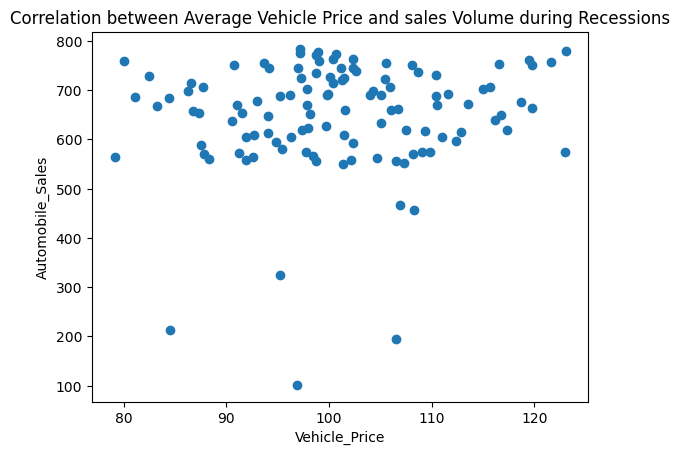

In [5]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Vehicle_Price')
plt.ylabel('Automobile_Sales')
plt.title('Correlation between Average Vehicle Price and sales Volume during Recessions')
plt.show()

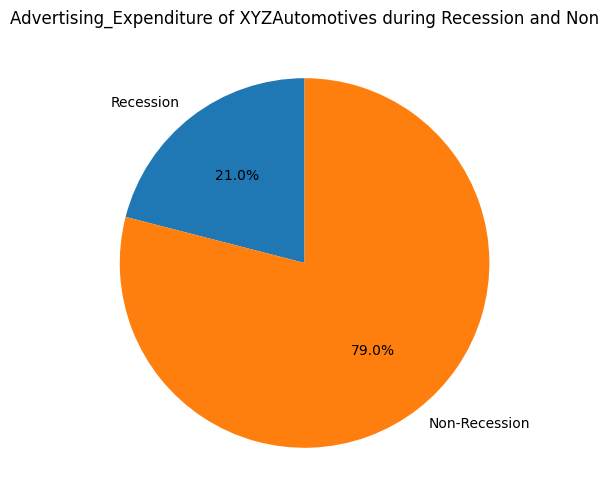

In [9]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising_Expenditure of XYZAutomotives during Recession and Non')
plt.show()

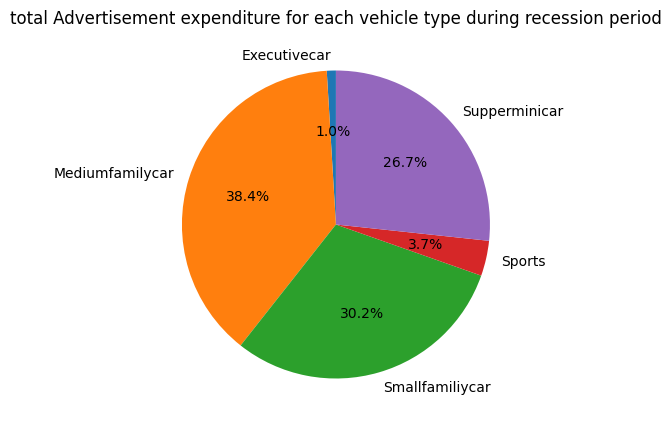

In [15]:
 # Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10,5))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('total Advertisement expenditure for each vehicle type during recession period')

plt.show()

<ipython-input-20-59a453784ef1>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


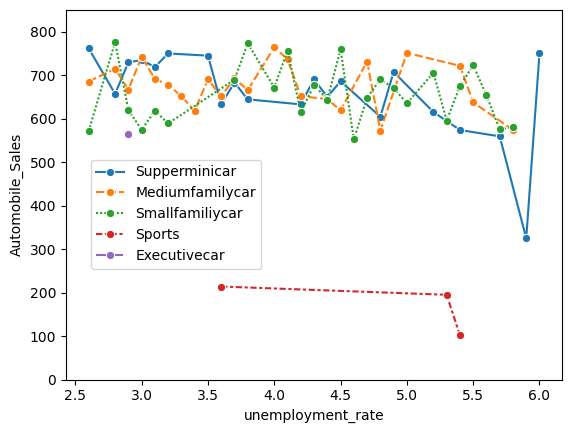

In [20]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))